In [1]:
import matplotlib.pyplot       as plt
import matplotlib.colors       as mcolors
import matplotlib.patches      as mpatches
import matplotlib.transforms   as mtransforms
import matplotlib.font_manager as font_manager
%matplotlib inline

In [2]:
import os
import h5py
import regex
import numpy as np

In [3]:
basedir = '/sdf/data/lcls/ds/prj/prjcwang31/results/proj.peaknet-10k/peaknet10k'
# file_cxi = 'mfxl1027522_highpH_DTT_red_slow.0333.hdf5'
# file_cxi = 'mfxl1027522_highpH_DTT_red_slow.no_elastic.0333.hdf5'
# file_cxi = 'mfxl1027522_highpH_DTT_red_slow.no_elastic.0535.hdf5'
# file_cxi = 'mfxl1027522_highpH_DTT_red_slow.no_elastic.0535.hdf5.bak.2024_0309'
file_cxi = 'mfxl1027522_highpH_DTT_red_slow.ios_1p0.0535.hdf5'
file_cxi = 'mfxl1027522_highpH_DTT_red_slow.ios_1p0.1410.hdf5'
# file_cxi = 'mfxp1002121_D4.ios_1p0.0044.hdf5'
file_cxi = 'mfxl1027522_highpH_DTT_red_slow.ios_1p0.0001.hdf5'
path_cxi = os.path.join(basedir, file_cxi)

In [4]:
# try:
#     f.close()
# except:
#     pass
# f = h5py.File(path_cxi, 'r')

In [5]:
idx = 9
with h5py.File(path_cxi, 'r') as f:
    pixel_map_x, pixel_map_y, pixel_map_z = f.get(f'data/data_{idx:04d}/metadata/pixel_map')[()]
    img = f.get(f'data/data_{idx:04d}/image')[()]
    label = f.get(f'data/data_{idx:04d}/label')[()]
    good_peaks = f.get(f'data/data_{idx:04d}/good_peaks')[()]

In [6]:
img.shape

(5632, 384)

In [7]:
pixel_map_x = np.round(pixel_map_x).astype(int)
pixel_map_y = np.round(pixel_map_y).astype(int)
pixel_map_z = np.round(pixel_map_z).astype(int)
detector_img = np.zeros((pixel_map_x.max() - pixel_map_x.min() + 1, pixel_map_y.max() - pixel_map_y.min() + 1))

In [8]:
detector_img.shape

(1667, 1665)

In [9]:
detector_img[pixel_map_x, pixel_map_y] = img

In [10]:
def display_img(img, scale = 14):
    ncols, nrows = 1, 1
    fig   = plt.figure(figsize = (ncols * scale, nrows * scale))
    gspec = fig.add_gridspec( nrows, ncols )
    ax_list = [ fig.add_subplot(gspec[i, j], aspect = 1) for i in range(nrows) for j in range(ncols)]

    ax = ax_list[0]

    vmin = np.nanmean(img) - 0 * np.nanstd(img)
    vmax = np.nanmean(img) + 4 * np.nanstd(img)
    im = ax.imshow(img, vmin = vmin, vmax = vmax)

    # ax.invert_xaxis()
    ax.invert_yaxis()

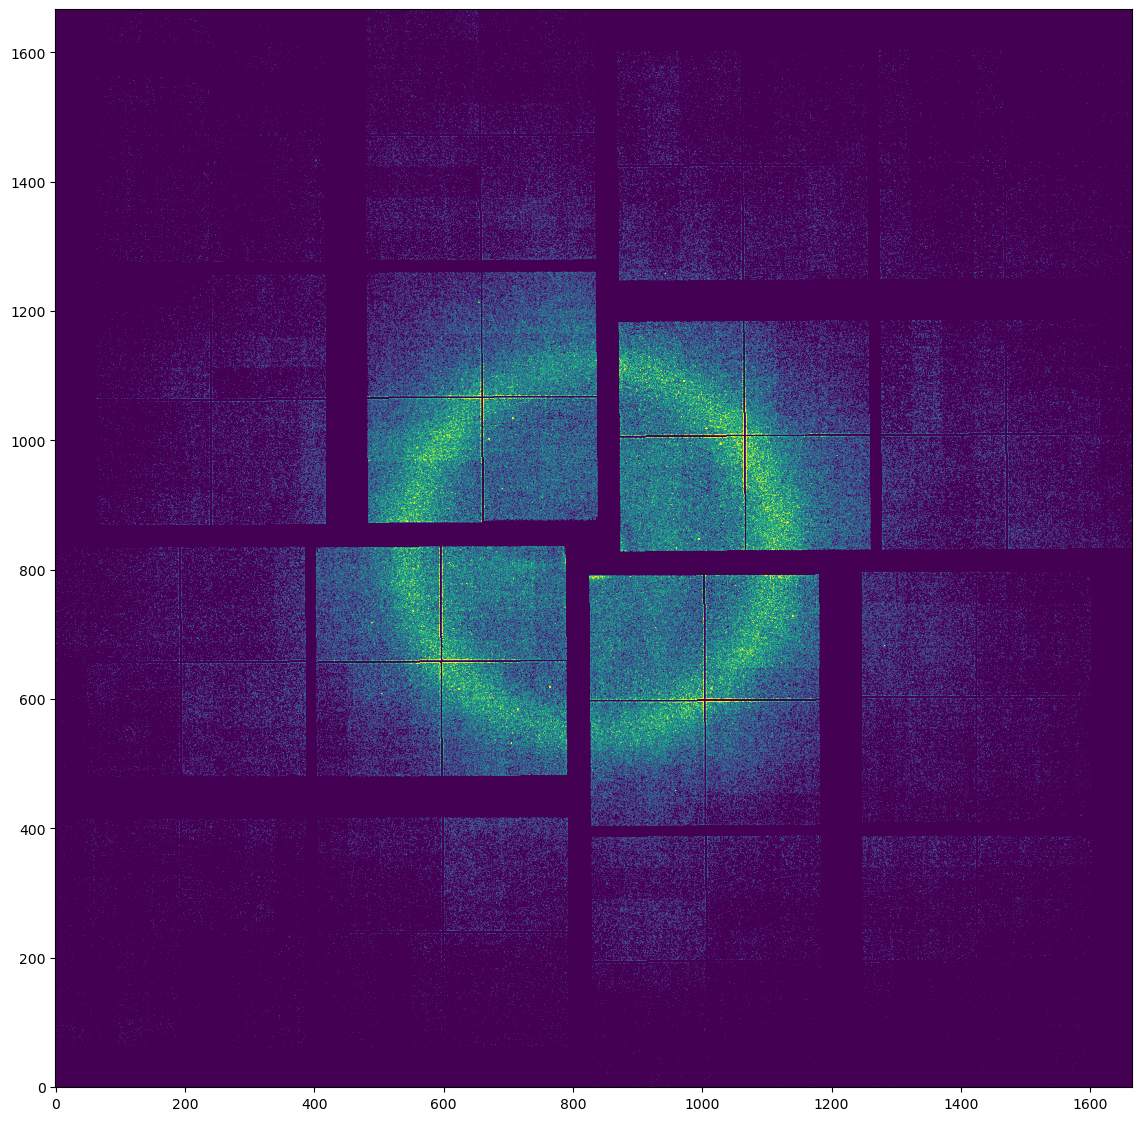

In [11]:
display_img(detector_img, scale = 14)

In [12]:
good_peaks.shape

(14, 2)

In [13]:
ss_loc, fs_loc = np.round(good_peaks).astype(int).transpose(1, 0)
peak_x_in_detector = pixel_map_x[ss_loc, fs_loc]
peak_y_in_detector = pixel_map_y[ss_loc, fs_loc]

In [14]:
peaks = np.array([peak_x_in_detector, peak_y_in_detector]).transpose(1, 0)
peaks.shape

(14, 2)

In [15]:
def display_peaks(img, peaks, scale = 14):
    ncols, nrows = 1, 1
    fig   = plt.figure(figsize = (ncols * scale, nrows * scale))
    gspec = fig.add_gridspec( nrows, ncols )
    ax_list = [ fig.add_subplot(gspec[i, j], aspect = 1) for i in range(nrows) for j in range(ncols)]

    ax = ax_list[0]

    vmin = np.nanmean(img) - 0 * np.nanstd(img)
    vmax = np.nanmean(img) + 4 * np.nanstd(img)
    im = ax.imshow(img, vmin = vmin, vmax = vmax)

    # ax.invert_xaxis()
    ax.invert_yaxis()

    # Plot all points from both sets.
    ax.scatter(peaks[:, 1], peaks[:, 0], s = 50, edgecolors='cyan', facecolors='none', linewidths=1.0, label='peaks', marker = 's')

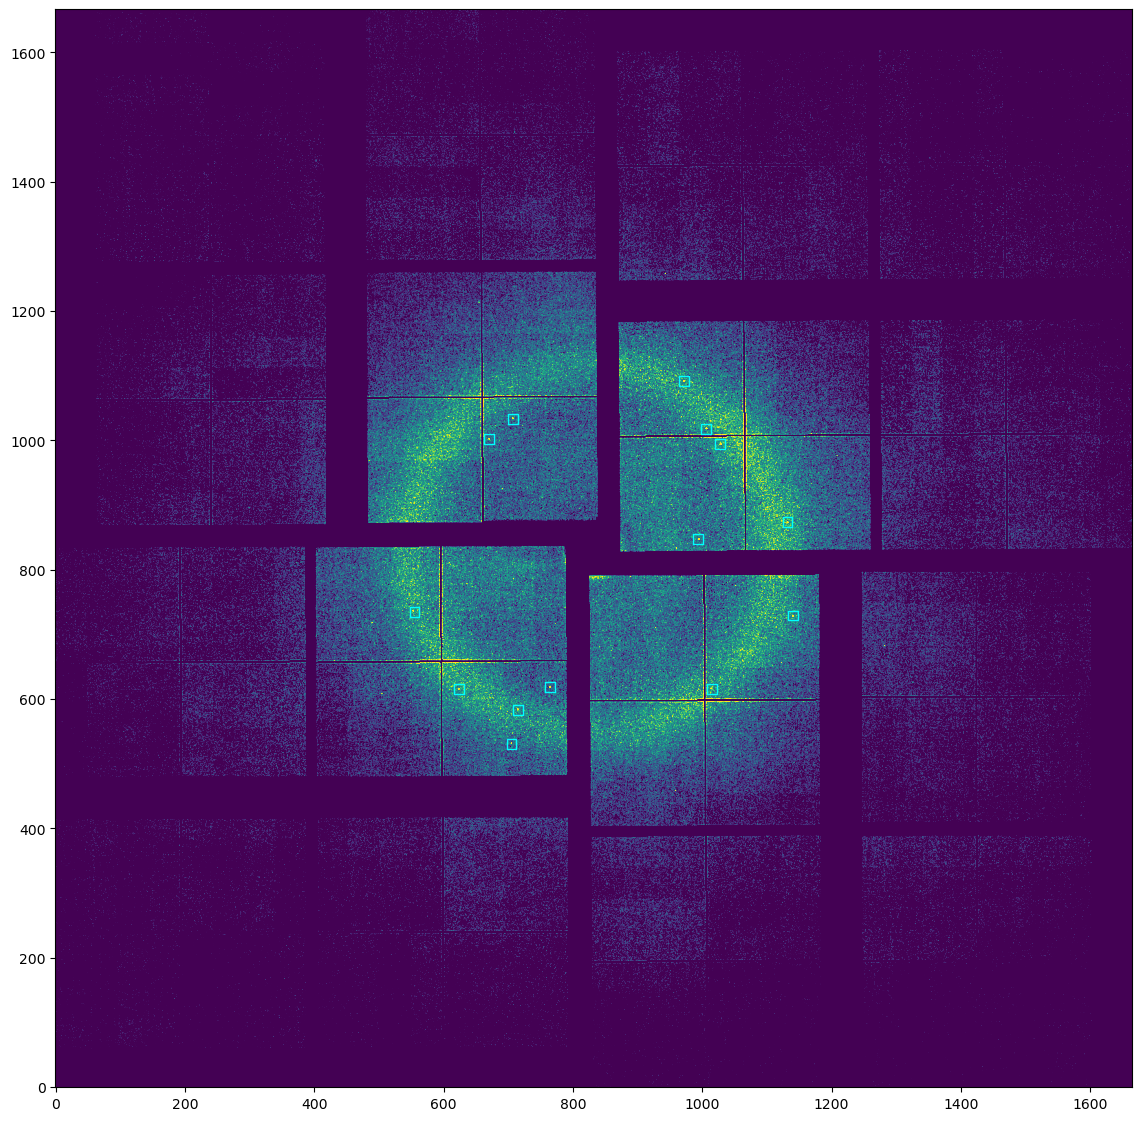

In [17]:
center_x, center_y = 1000, 950
win_size = 500
view_min_x, view_max_x = center_x - win_size, center_x + win_size
view_min_y, view_max_y = center_y - win_size, center_y + win_size
# display_peaks(detector_img[view_min_x:view_max_x, view_min_y:view_max_y], peaks - np.array([view_min_x, view_min_y]).reshape(1, 2), scale = 14)
display_peaks(detector_img, peaks, scale = 14)